In [2]:
from scipy import *
from matplotlib.pyplot import *
from scipy.linalg import *
from numpy.linalg import *
import scipy.sparse as sparse
from scipy.integrate import quad
import numpy as np
import pandas as pd
from scipy.sparse.linalg import splu
from timeit import default_timer as timer
import matplotlib.pyplot as plt

In [89]:
def trapezoid(f,a,b,n):
	"""
	trapezoid(f,a,b,n)

	Apply the trapezoid integration formula for integrand `f` over interval [`a`,`b`], broken up into `n` equal pieces. Returns estimate, vector of nodes, and vector of integrand values at the nodes.
	"""
	h = (b-a)/n
	t = np.linspace(a,b,n+1)
	y = f(t)
	T = h * ( np.sum(y[1:-1]) + 0.5*(y[0] + y[-1]) )

	return T

# T1

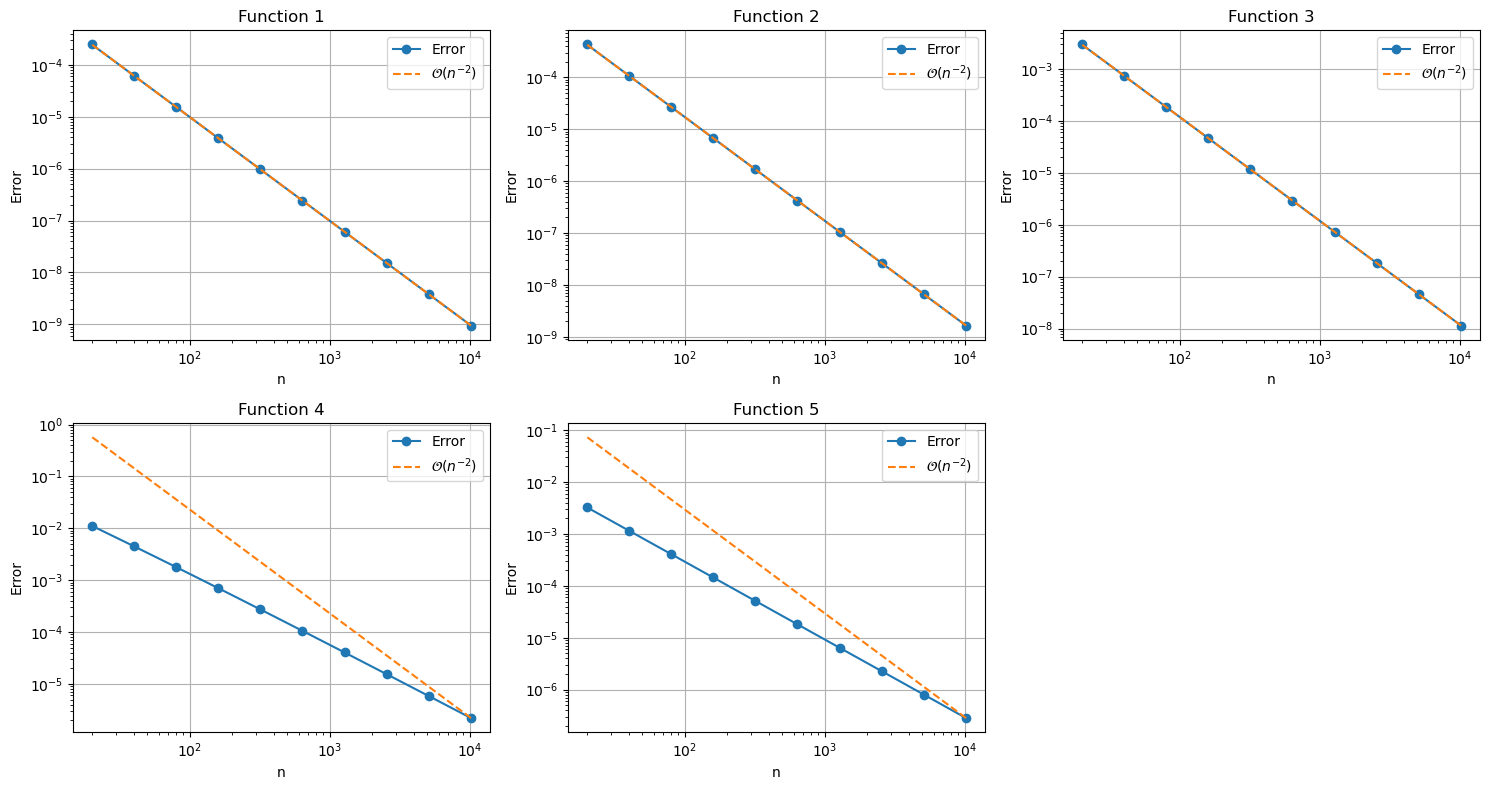

In [90]:
# 5 个函数定义和积分真值
functions = [
    (lambda x: x*np.log(1 + x), 0.25),                        
    (lambda x: x**2 * np.arctan(x), (np.pi - 2 + 2*np.log(2))/12),
    (lambda x: np.exp(x)*np.cos(x),  (np.exp(np.pi/2) - 1)/2),
    (lambda x: np.sqrt(x) * np.log(x), -4/9),                         
    (lambda x: np.sqrt(1 - x**2), np.pi/4),                     
]

intervals = [
    (0, 1), (0, 1), (0, np.pi/2), (np.finfo(np.float64).eps, 1), (0, 1)
]

true_values = [f[1] for f in functions]
functions = [f[0] for f in functions]


# 准备图形
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()


# Values of n
ns = 10 * 2 ** np.arange(10, 0, -1)

for i, (f, (a, b), true_val) in enumerate(zip(functions, intervals, true_values)):
    errors = []

    for n in ns:
        approx = trapezoid(f, a, b, n)
        error = np.abs(approx - true_val)
        errors.append(error)

    axs[i].loglog(ns, errors, 'o-', label='Error')
    axs[i].loglog(ns, errors[0]*(ns/ns[0])**(-2), '--', label='$\\mathcal{O}(n^{-2})$')  # 二阶收敛参考线
    axs[i].set_title(f'Function {i+1}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error')
    axs[i].legend()
    axs[i].grid(True)

fig.delaxes(axs[5])  # 删除第6个多余的子图
plt.tight_layout()
plt.show()


# T3

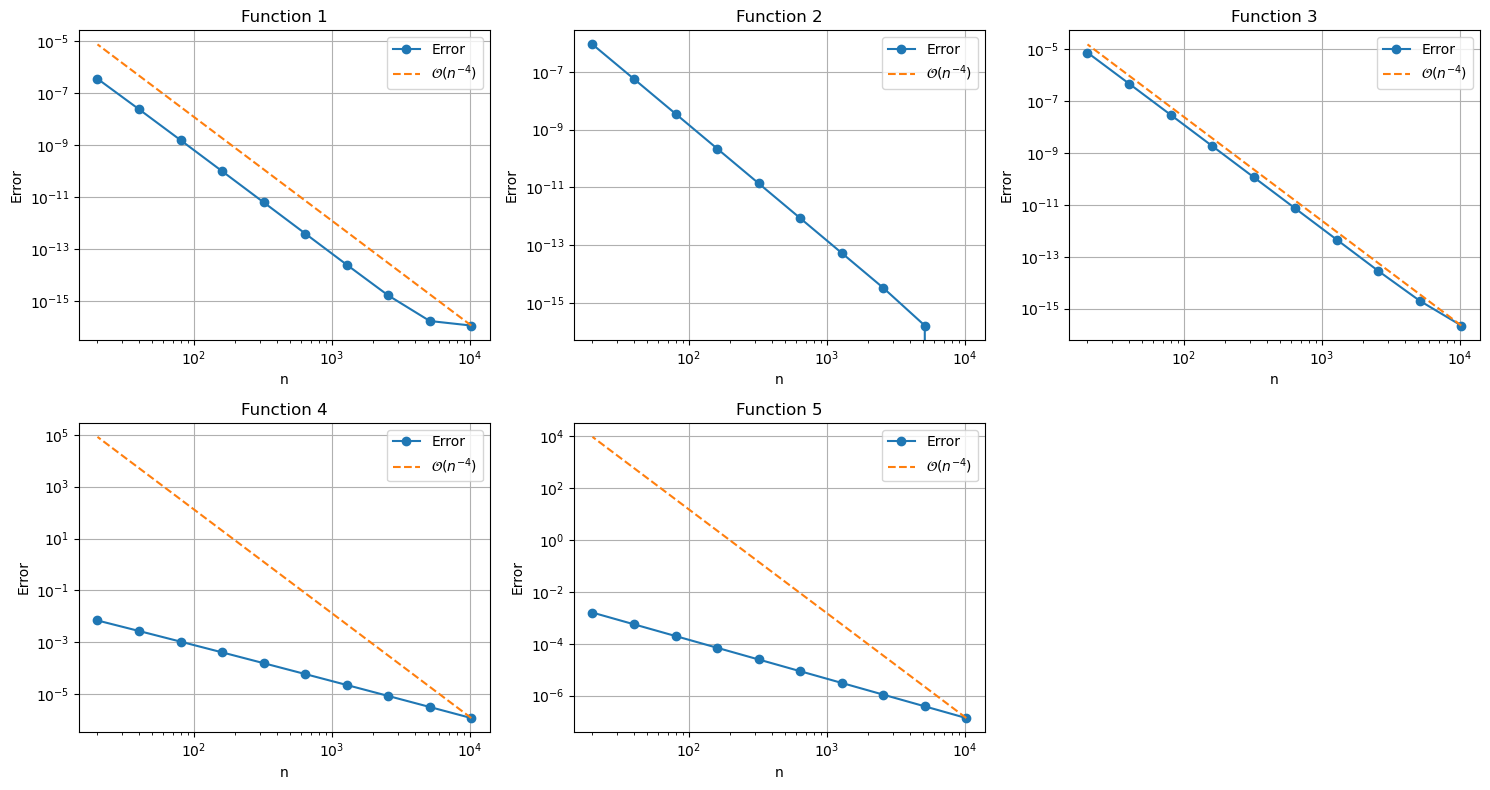

In [91]:
# def trapezoid(f,a,b,n):
# 	"""
# 	trapezoid(f,a,b,n)

# 	Apply the trapezoid integration formula for integrand `f` over interval [`a`,`b`], broken up into `n` equal pieces. Returns estimate, vector of nodes, and vector of integrand values at the nodes.
# 	"""
# 	h = (b-a)/n
# 	t = np.linspace(a,b,n+1)
# 	y = f(t)
# 	T = h * ( sum(y[1:-1]) + 0.5*(y[0] + y[-1]) )

# 	return T

def gregory(f, a, b, n):
    h = (b - a)/n
    t = np.linspace(a, b, n+1)
    y = f(t)
    T = trapezoid(f, a, b, n)
    G = T - (h/24)*(3*(y[-1]+y[0]) - 4*(y[-2] + y[1]) + (y[-3] + y[2]))
    
    return G
# 5 个函数定义和积分真值
functions = [
    (lambda x: x*np.log(1 + x), 0.25),                        
    (lambda x: x**2 * np.arctan(x), (np.pi - 2 + 2*np.log(2))/12),
    (lambda x: np.exp(x)*np.cos(x),  (np.exp(np.pi/2) - 1)/2),
    (lambda x: np.sqrt(x) * np.log(x), -4/9),                         
    (lambda x: np.sqrt(1 - x**2), np.pi/4),                     
]

intervals = [
    (0, 1), (0, 1), (0, np.pi/2), (np.finfo(np.float64).eps, 1), (0, 1)
]

true_values = [f[1] for f in functions]
functions = [f[0] for f in functions]


# 准备图形
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()


# Values of n
ns = 10 * 2 ** np.arange(10, 0, -1)

for i, (f, (a, b), true_val) in enumerate(zip(functions, intervals, true_values)):
    errors = []

    for n in ns:
        approx = gregory(f, a, b, n)
        error = np.abs(approx - true_val)
        errors.append(error)
    # print(errors)
    axs[i].loglog(ns, errors, 'o-', label='Error')
    axs[i].loglog(ns, errors[0]*(ns/ns[0])**(-4), '--', label='$\\mathcal{O}(n^{-4})$')  # 二阶收敛参考线
    axs[i].set_title(f'Function {i+1}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error')
    axs[i].legend()
    axs[i].grid(True)

fig.delaxes(axs[5])  # 删除第6个多余的子图
plt.tight_layout()
plt.show()

# T6

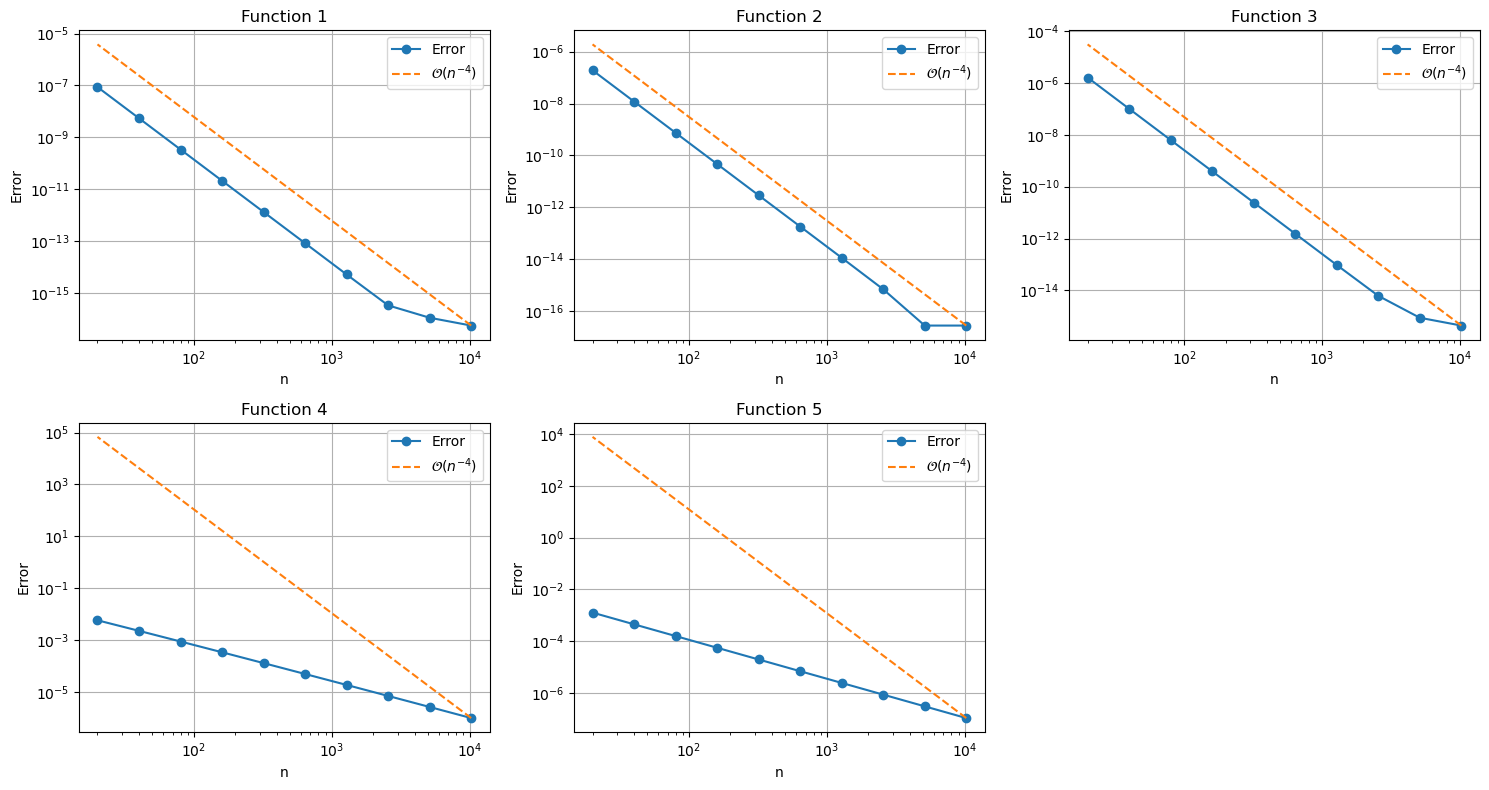

In [92]:
# def trapezoid(f,a,b,n):
# 	"""
# 	trapezoid(f,a,b,n)

# 	Apply the trapezoid integration formula for integrand `f` over interval [`a`,`b`], broken up into `n` equal pieces. Returns estimate, vector of nodes, and vector of integrand values at the nodes.
# 	"""
# 	h = (b-a)/n
# 	t = np.linspace(a,b,n+1)
# 	y = f(t)
# 	T = h * ( sum(y[1:-1]) + 0.5*(y[0] + y[-1]) )

# 	return T

def simpson(f, a, b, n):
    h = (b - a)/n
    t = np.linspace(a, b, n+1)
    y = f(t)
    Tn = trapezoid(f, a, b, n)
    T_nhalf = trapezoid(f, a, b, int(n/2))
    S = (1/3)*(4*Tn - T_nhalf)
    
    return S
    
# 5 个函数定义和积分真值
functions = [
    (lambda x: x*np.log(1 + x), 0.25),                        
    (lambda x: x**2 * np.arctan(x), (np.pi - 2 + 2*np.log(2))/12),
    (lambda x: np.exp(x)*np.cos(x),  (np.exp(np.pi/2) - 1)/2),
    (lambda x: np.sqrt(x) * np.log(x), -4/9),                         
    (lambda x: np.sqrt(1 - x**2), np.pi/4),                     
]

intervals = [
    (0, 1), (0, 1), (0, np.pi/2), (np.finfo(np.float64).eps, 1), (0, 1)
]

true_values = [f[1] for f in functions]
functions = [f[0] for f in functions]


# 准备图形
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()


# Values of n
ns = 10 * 2 ** np.arange(10, 0, -1)

for i, (f, (a, b), true_val) in enumerate(zip(functions, intervals, true_values)):
    errors = []

    for n in ns:
        approx = simpson(f, a, b, n)
        error = np.abs(approx - true_val)
        errors.append(error)
    # print(errors)
    axs[i].loglog(ns, errors, 'o-', label='Error')
    axs[i].loglog(ns, errors[0]*(ns/ns[0])**(-4), '--', label='$\\mathcal{O}(n^{-4})$')  # 二阶收敛参考线
    axs[i].set_title(f'Function {i+1}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error')
    axs[i].legend()
    axs[i].grid(True)

fig.delaxes(axs[5])  # 删除第6个多余的子图
plt.tight_layout()
plt.show()

# T7

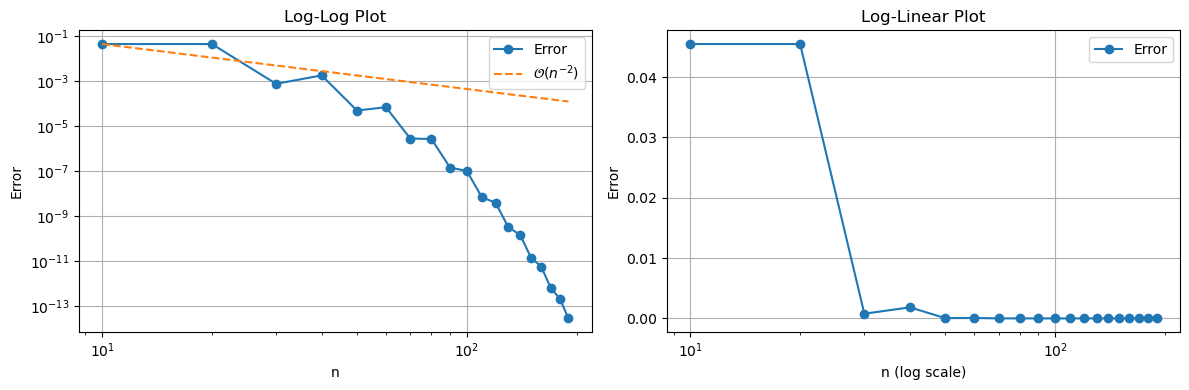

In [93]:
# 函数定义与积分区间
f = lambda x: 1/(2.01+np.sin(6*np.pi*x)-np.cos(2*np.pi*x))
a, b = 0, 1
true_value = 0.9300357672424684

# Value of n
ns = 10 * np.arange(1, 20)
errors = []


for n in ns:
        approx = trapezoid(f, a, b, n)
        error = np.abs(approx - true_value)
        errors.append(error)

# 画误差图
# 创建两张图：一个 log-log，一个 log-linear
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# --- 图1：log-log ---
axs[0].loglog(ns, errors, 'o-', label='Error')
axs[0].loglog(ns, errors[0]*(ns/ns[0])**(-2), '--', label='$\\mathcal{O}(n^{-2})$')
axs[0].set_title('Log-Log Plot')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Error')
axs[0].grid(True)
axs[0].legend()

# --- 图2：log-linear（横轴 log(n)，纵轴 linear error）---
axs[1].semilogx(ns, errors, 'o-', label='Error')
axs[1].set_title('Log-Linear Plot')
axs[1].set_xlabel('n (log scale)')
axs[1].set_ylabel('Error')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


# T8

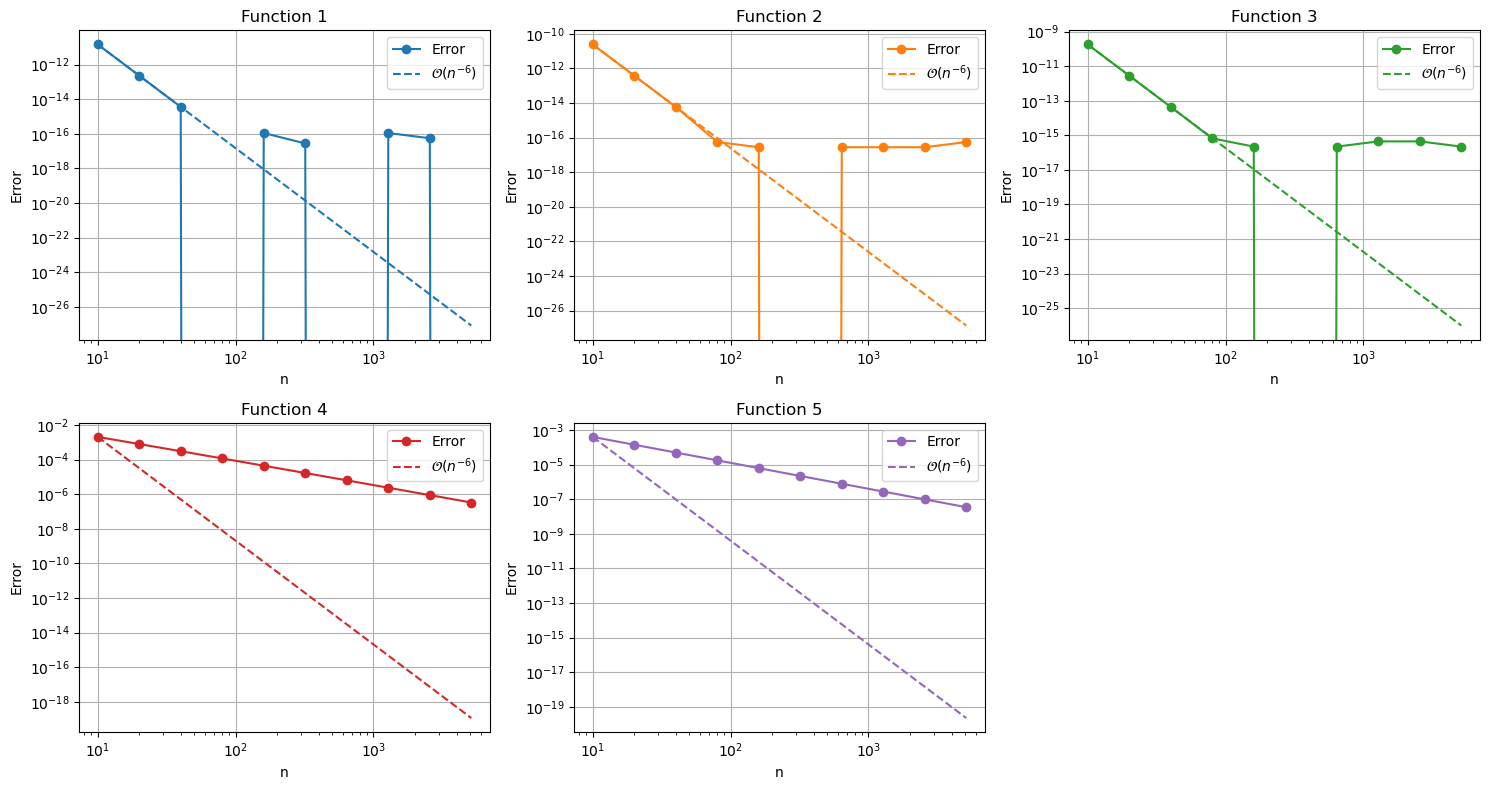

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# 使用 NumPy 实现梯形法
def trapezoid_np(f, a, b, n):
    h = (b - a) / n
    t = np.linspace(a, b, n + 1)
    y = f(t)
    T = h * (np.sum(y[1:-1]) + 0.5 * (y[0] + y[-1]))
    return T

# 使用 NumPy 实现 Simpson 法
def simpson_np(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule.")
    Tn = trapezoid_np(f, a, b, n)
    T_nhalf = trapezoid_np(f, a, b, n // 2)
    S = (1/3) * (4 * Tn - T_nhalf)
    return S

# 使用 NumPy 实现 Romberg 外推（六阶）
def romberg_np(f, a, b, n):
    S_4n = simpson_np(f, a, b, 4 * n)
    S_2n = simpson_np(f, a, b, 2 * n)
    R = (1/15) * (16 * S_4n - S_2n)
    return R

# 定义 5 个函数及其真值（NumPy版本）
functions = [
    (lambda x: x * np.log(1 + x), 0.25),
    (lambda x: x**2 * np.arctan(x), (np.pi - 2 + 2 * np.log(2)) / 12),
    (lambda x: np.exp(x) * np.cos(x), (np.exp(np.pi / 2) - 1) / 2),
    (lambda x: np.sqrt(x) * np.log(x), -4 / 9),
    (lambda x: np.sqrt(1 - x**2), np.pi / 4),
]

intervals = [
    (0, 1),
    (0, 1),
    (0, np.pi / 2),
    (np.finfo(np.float64).eps, 1),
    (0, 1),
]

true_values = [f[1] for f in functions]
functions = [f[0] for f in functions]

# 为了颜色一致，提前设置颜色序列
colors = plt.cm.tab10.colors

# 创建图形
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

ns = [10 * 2**k for k in range(10)]

for i, (f, (a, b), true_val) in enumerate(zip(functions, intervals, true_values)):
    errors = []
    for n in ns:
        approx = romberg_np(f, a, b, n)
        error = abs(approx - true_val)
        errors.append(error)

    color = colors[i % len(colors)]  # 使用相同的颜色序列

    axs[i].loglog(ns, errors, 'o-', label='Error', color=color)
    ref_line = errors[0] * (np.array(ns[0]) / np.array(ns))**6
    axs[i].loglog(ns, ref_line, '--', label=r'$\mathcal{O}(n^{-6})$', color=color)

    axs[i].set_title(f'Function {i+1}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error')
    axs[i].legend()
    axs[i].grid(True)

fig.delaxes(axs[5])
plt.tight_layout()
plt.show()


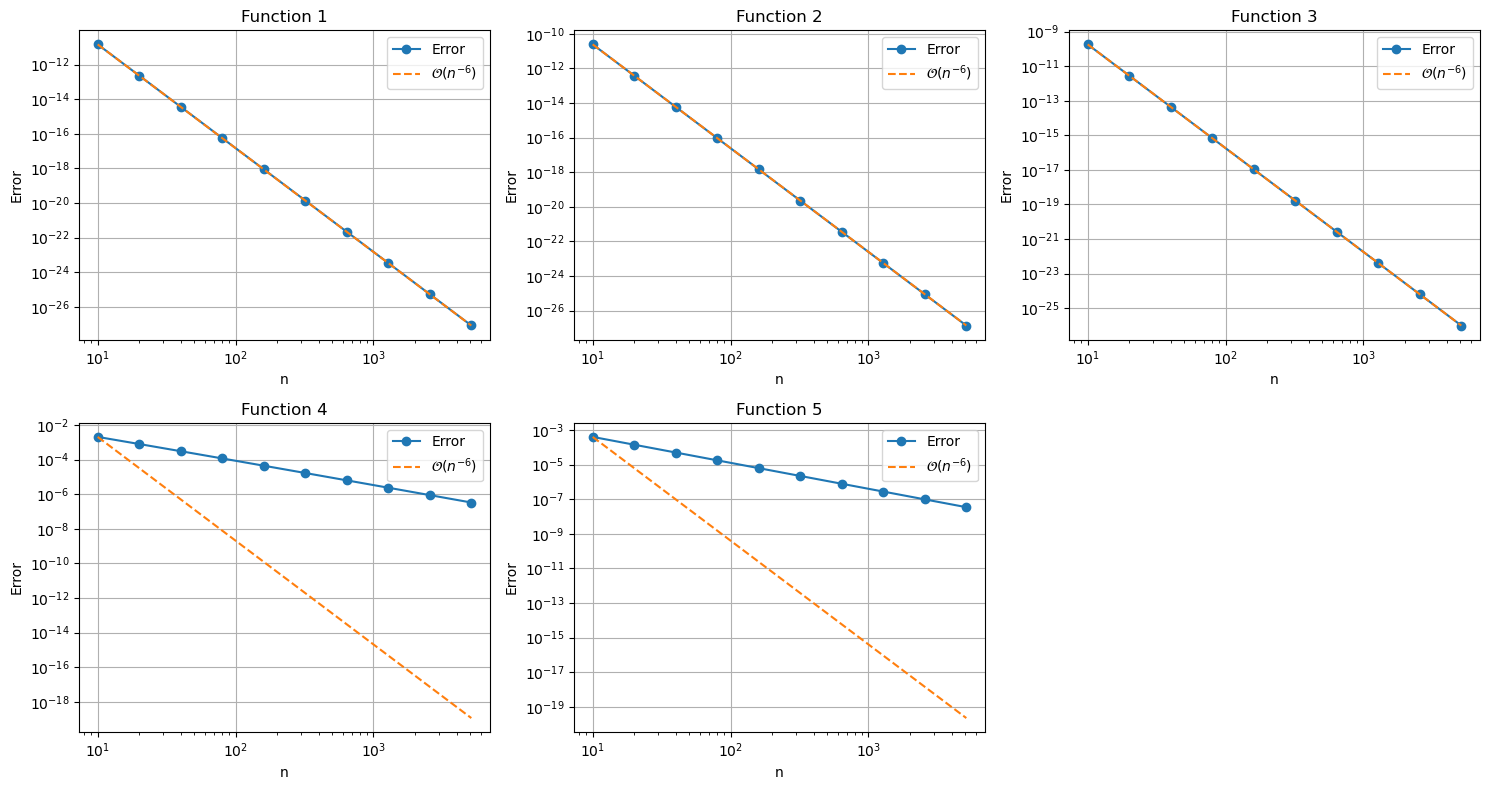

In [87]:
from mpmath import mp

# 设置高精度
mp.dps = 50

# 用 mpmath 实现复合梯形法
def trapezoid(f, a, b, n):
    h = mp.mpf(b - a) / n
    t = [a + i * h for i in range(n + 1)]
    y = [f(ti) for ti in t]
    T = h * (mp.fsum(y[1:-1]) + mp.mpf("0.5") * (y[0] + y[-1]))
    return T

# 用 mpmath 实现 Simpson 法
def simpson(f, a, b, n):
    if n % 2 != 0:
        raise ValueError("n must be even for Simpson's rule.")
    Tn = trapezoid(f, a, b, n)
    T_nhalf = trapezoid(f, a, b, n // 2)
    S = mp.mpf("1") / 3 * (4 * Tn - T_nhalf)
    return S

# 用 mpmath 实现六阶 Romberg 法（两次外推）
def romberg(f, a, b, n):
    S_4n = simpson(f, a, b, 4 * n)
    S_2n = simpson(f, a, b, 2 * n)
    R = mp.mpf("1") / 15 * (16 * S_4n - S_2n)
    return R

# 定义函数和真值（用 mpmath 函数）
functions = [
    (lambda x: x * mp.log(1 + x), mp.mpf("0.25")),
    (lambda x: x**2 * mp.atan(x), (mp.pi - 2 + 2 * mp.log(2)) / 12),
    (lambda x: mp.exp(x) * mp.cos(x), (mp.exp(mp.pi / 2) - 1) / 2),
    (lambda x: mp.sqrt(x) * mp.log(x), -mp.mpf("4") / 9),
    (lambda x: mp.sqrt(1 - x**2), mp.pi / 4),
]

intervals = [
    (mp.mpf("0"), mp.mpf("1")),
    (mp.mpf("0"), mp.mpf("1")),
    (mp.mpf("0"), mp.pi / 2),
    (mp.mpf("1e-50"), mp.mpf("1")),  # 避免 log(0)
    (mp.mpf("0"), mp.mpf("1")),
]

true_values = [f[1] for f in functions]
functions = [f[0] for f in functions]

# 准备图形
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

# 使用整数列表表示 n，数量级从小到大
ns = [10 * 2**k for k in range(10)]

for i, (f, (a, b), true_val) in enumerate(zip(functions, intervals, true_values)):
    errors = []
    for n in ns:
        approx = romberg(f, a, b, n)
        error = abs(approx - true_val)
        errors.append(float(error))  # 转为 float 用于 matplotlib

    # 绘图
    axs[i].loglog(ns, errors, 'o-', label='Error')
    # 添加参考线：和第一个误差值对齐的 n^{-6} 曲线
    ref_line = errors[0] * (np.array(ns[0]) / np.array(ns))**6
    axs[i].loglog(ns, ref_line, '--', label=r'$\mathcal{O}(n^{-6})$')
    axs[i].set_title(f'Function {i+1}')
    axs[i].set_xlabel('n')
    axs[i].set_ylabel('Error')
    axs[i].legend()
    axs[i].grid(True)

# 删除空子图
fig.delaxes(axs[5])
plt.tight_layout()
plt.show()